# Explore here

1. Recopilación de datos

In [15]:
#Se han recopilado datos socio demográficos y de recursos de salud por condado en los Estados Unidos y queremos descubrir si existe alguna relación entre los recursos sanitarios y los datos socio demográficos.
import pandas as pd 

#Recopila los datos del archivo csv
data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/regularized-linear-regression-project-tutorial/main/demographic_health_data.csv")

#Lee las tablas 
pd.set_option("display.max_columns", None)
data

#Nuestra variable objetivo sera Heart disease_prevalence

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,40-49,40-49 y/o % of total pop,50-59,50-59 y/o % of total pop,60-69,60-69 y/o % of total pop,70-79,70-79 y/o % of total pop,80+,80+ y/o % of total pop,White-alone pop,% White-alone,Black-alone pop,% Black-alone,Native American/American Indian-alone pop,% NA/AI-alone,Asian-alone pop,% Asian-alone,Hawaiian/Pacific Islander-alone pop,% Hawaiian/PI-alone,Two or more races pop,% Two or more races,POP_ESTIMATE_2018,N_POP_CHG_2018,GQ_ESTIMATES_2018,R_birth_2018,R_death_2018,R_NATURAL_INC_2018,R_INTERNATIONAL_MIG_2018,R_DOMESTIC_MIG_2018,R_NET_MIG_2018,Less than a high school diploma 2014-18,High school diploma only 2014-18,Some college or associate's degree 2014-18,Bachelor's degree or higher 2014-18,Percent of adults with less than a high school diploma 2014-18,Percent of adults with a high school diploma only 2014-18,Percent of adults completing some college or associate's degree 2014-18,Percent of adults with a bachelor's degree or higher 2014-18,POVALL_2018,PCTPOVALL_2018,PCTPOV017_2018,PCTPOV517_2018,MEDHHINC_2018,CI90LBINC_2018,CI90UBINC_2018,Civilian_labor_force_2018,Employed_2018,Unemployed_2018,Unemployment_rate_2018,Median_Household_Income_2018,Med_HH_Income_Percent_of_State_Total_2018,Active Physicians per 100000 Population 2018 (AAMC),Total Active Patient Care Physicians per 100000 Population 2018 (AAMC),Active Primary Care Physicians per 100000 Population 2018 (AAMC),Active Patient Care Primary Care Physicians per 100000 Population 2018 (AAMC),Active General Surgeons per 100000 Population 2018 (AAMC),Active Patient Care General Surgeons per 100000 Population 2018 (AAMC),Total nurse practitioners (2019),Total physician assistants (2019),Total Hospitals (2019),Internal Medicine Primary Care (2019),Family Medicine/General Practice Primary Care (2019),Total Specialist Physicians (2019),ICU Beds_x,Total Population,Population Aged 60+,Percent of Population Aged 60+,COUNTY_NAME,STATE_NAME,STATE_FIPS,CNTY_FIPS,county_pop2018_18 and older,anycondition_prevalence,anycondition_Lower 95% CI,anycondition_Upper 95% CI,anycondition_number,Obesity_prevalence,Obesity_Lower 95% CI,Obesity_Upper 95% CI,Obesity_number,Heart disease_prevalence,Heart disease_Lower 95% CI,Heart disease_Upper 95% CI,Heart disease_number,COPD_prevalence,COPD_Lower 95% CI,COPD_Upper 95% CI,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
0,1001,55601,6787,12.206615,7637,13.735364,6878,12.370281,7089,12.749771,7582,13.636445,7738,13.917016,5826,10.478229,4050,7.284042,2014,3.622237,42660,76.725239,10915,19.630942,267,0.480207,681,1.224798,62,0.111509,1016,1.827305,55601,158,455,11.8,9.6,2.2,0.0,0.7,0.6,4204,12119,10552,10291,11.3,32.6,28.4,27.7,7587,13.8,19.3,19.5,59338,53628,65048,25957,25015,942,3.6,59338,119.0,217.1,196.7,77.2,71.2,7.6,6.9,28.859137,6.085786,1.148905,25.992561,21.249061,72.142154,6,55036,10523,19.1,Autauga,Alabama,1,1,42438,47.6,45.4,49.4,20181,35.8,34.2,37.3,15193,7.9,7.2,8.7,3345,8.6,7.3,9.9,3644,12.9,11.9,13.8,5462,3.1,2.9,3.3,1326,3
1,1003,218022,24757,11.355276,26913,12.344167,23579,10.814964,25213,11.564429,27338,12.539102,29986,13.753658,29932,13.728890,20936,9.602701,9368,4.296814,190301,87.285228,19492,8.940382,1684,0.772399,2508,1.150343,146,0.066966,3891,1.784682,218022,5403,2190,10.5,10.3,0.1,0.5,24.3,24.8,14310,40579,46025,46075,9.7,27.6,31.3,31.3,21069,9.8,13.9,13.1,57588,54437,60739,93849,90456,3393,3.6,57588,115.5,217.1,196.7,77.2,71.2,7.6,6.9,113.162114,23.863512,4.505074,101.921730,83.321572,282.882982,51,203360,53519,26.3,Baldwin,Alabama,1,3,170912,40.2,38.2,42.3,68790,29.7,28.4,31.0,50761,7.8,7.0,8.7,13414,8.6,7.2,10.1,14692,12.0,11.0,13.1,20520,3.2,3.0,3.5,5479,4
2,1005,24881,2732,10.980266,2960,11.896628,3268,13.134520,3201,12.865239,3074,12.354809,3278,13.174712,3076,12.3

In [16]:
#Se guardan el archivo

data.to_csv("../data/raw/recursos-salud.csv")

2. Exploración y limpieza de datos

In [17]:
#Dimension del Dataframe 
data.shape

#Tenemos 108 columnas y 3140 filas

(3140, 108)

In [18]:
#Revisar si existe un valor nulo 
print(data.isnull().values.any())

#No existen valores nulos 

False


In [19]:
data = data.drop_duplicates().reset_index(drop = True)

data.shape

#No existian datos duplicados , ya que nos retorno la misma cantidad de filas 

(3140, 108)

In [20]:
#Factorizar todas las variables categoricas 

for col in data.select_dtypes(include=['object']).columns:
    data[col],_ = pd.factorize(data[col])



In [26]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_regression

# variable objetivo
X = data.drop("Heart disease_prevalence", axis=1)
y = data["Heart disease_prevalence"]

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Seleccionar las mejores variables
selector = SelectKBest(score_func=f_regression, k=10)

X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)


# Guardar los datos seleccionados en DataFrames
X_train_selected_df = pd.DataFrame(X_train_selected, columns=selected_columns, index=X_train.index)
X_test_selected_df = pd.DataFrame(X_test_selected, columns=selected_columns, index=X_test.index)

#El dataset que utilizaremos 
data_mod = pd.concat([X_train_selected_df, X_test_selected_df], axis=0)



In [27]:
data_mod.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3140 entries, 1292 to 2650
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Heart disease_Lower 95% CI  3140 non-null   float64
 1   Heart disease_Upper 95% CI  3140 non-null   float64
 2   COPD_prevalence             3140 non-null   float64
 3   COPD_Lower 95% CI           3140 non-null   float64
 4   COPD_Upper 95% CI           3140 non-null   float64
 5   diabetes_prevalence         3140 non-null   float64
 6   diabetes_Upper 95% CI       3140 non-null   float64
 7   CKD_prevalence              3140 non-null   float64
 8   CKD_Lower 95% CI            3140 non-null   float64
 9   CKD_Upper 95% CI            3140 non-null   float64
dtypes: float64(10)
memory usage: 269.8 KB


3. Análisis de variables multivariadas

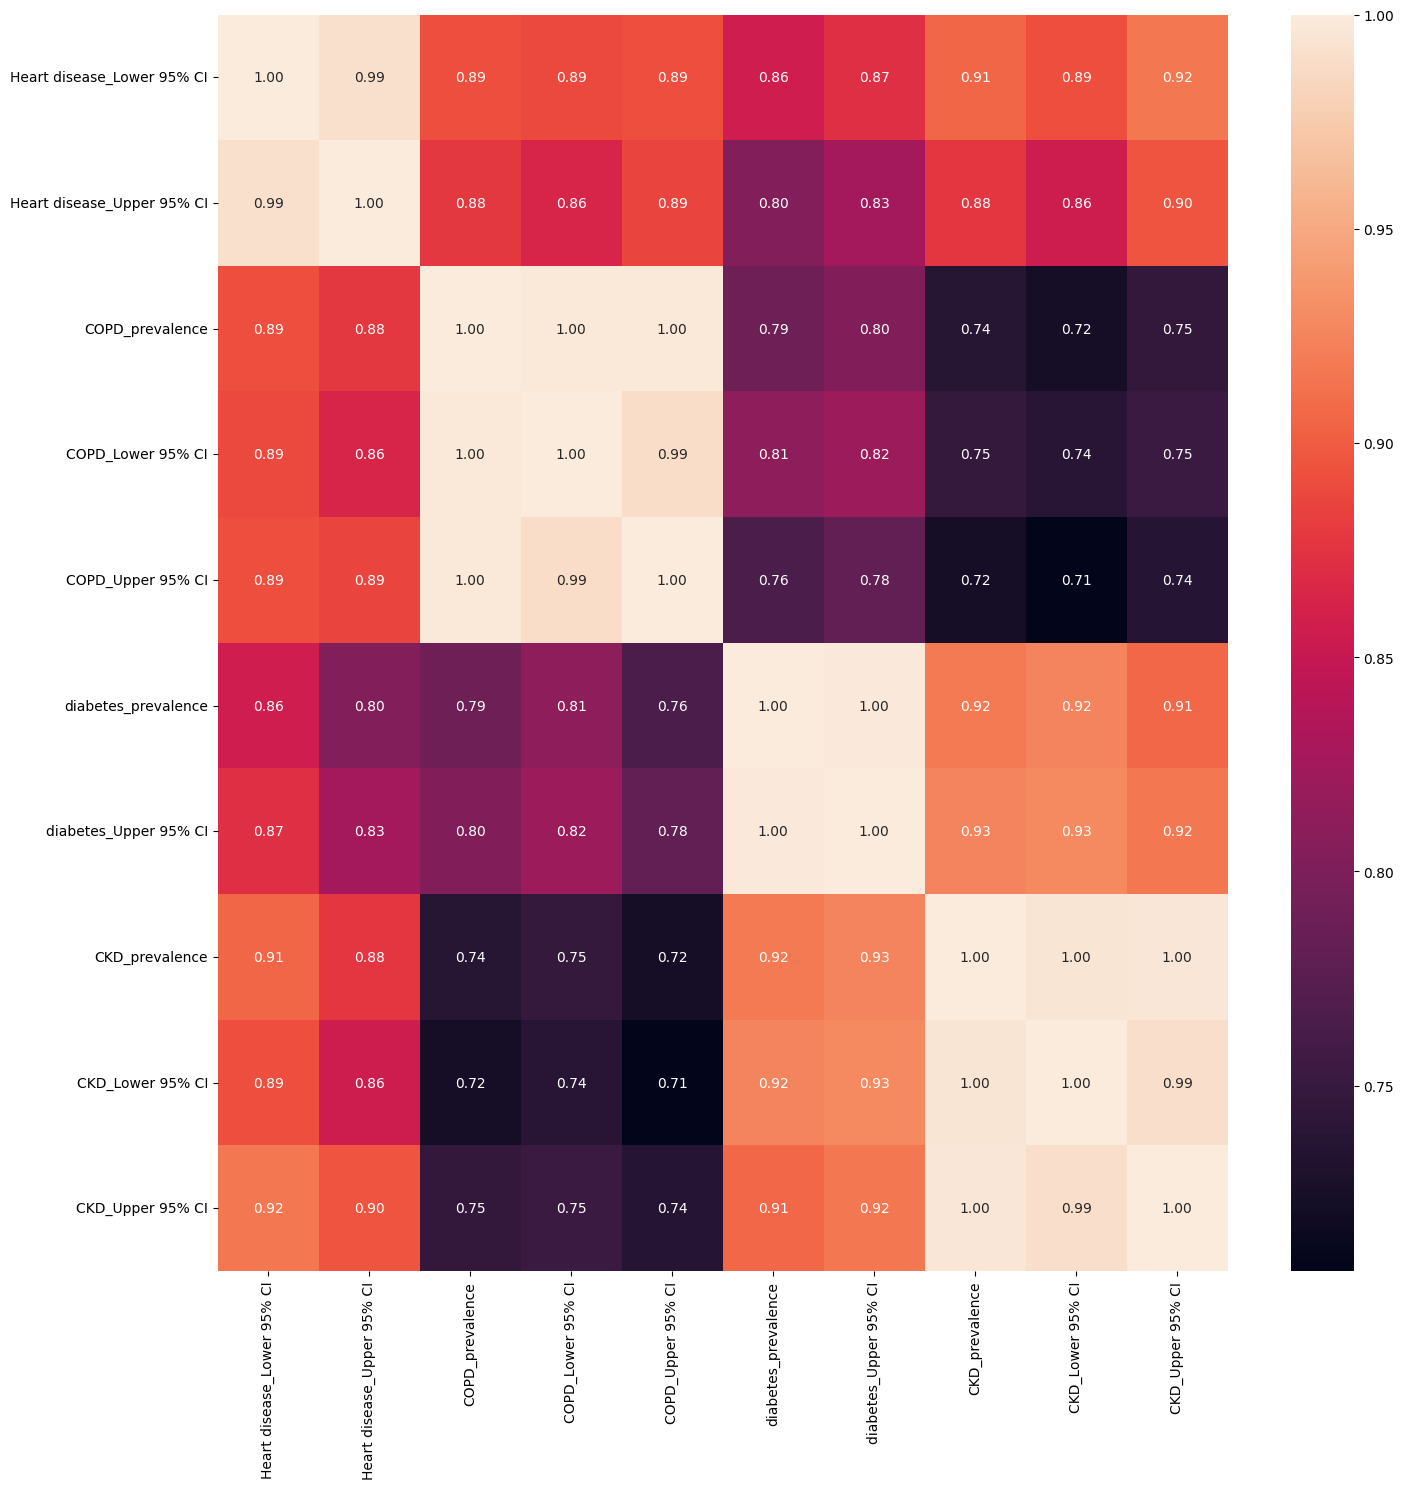

In [34]:
#Analisis numerico categorico 

#El objetivo del código es crear un heatmap de correlación que muestre la relación entre diferentes variables del dataset.


import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(figsize=(15, 15))

sns.heatmap(data_mod.corr(), annot = True, fmt = ".2f")

plt.tight_layout()

# Muestra el grafico
plt.show()

In [ ]:
# Crear la figura y ejes (2 filas, 2 columnas)
fig, axis = plt.subplots(2, 2, figsize=(10, 14))

# Regplot 
sns.regplot(ax=axis[0, 0], data=data_mod, x="age", y="Heart disease_prevalence", 
            scatter_kws={'color': '#ff7f0e'}, line_kws={'color': '#9467bd'}).set(ylabel=None)

# Heatmap 
sns.heatmap(data_mod[["Heart disease_prevalence", "age"]].corr(), annot=True, fmt=".2f", ax=axis[1, 0], cmap='coolwarm')



# Regplot 
sns.regplot(ax=axis[0, 1], data=data_mod, x="bmi", y="Heart disease_prevalence", 
            scatter_kws={'color': '#2ca02c'}, line_kws={'color': '#8c564b'}).set(ylabel=None)

# Heatmap 
sns.heatmap(data_mod[["Heart disease_prevalence", "bmi"]].corr(), annot=True, fmt=".2f", ax=axis[1, 1], cmap='coolwarm')

# Ajustar el layout
plt.tight_layout()

# Mostrar el gráfico
plt.show()
